In [1]:
!pip install statsmodel

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import hvplot.pandas
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import boxcox
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
# df.columns
df

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
0          1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW    1.79   
1          2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW    4.92   
2          3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW    6.71   
3          4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW    9.84   
4          5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW   12.97   
...      ...   ...    ...  ...   ...    ...   ...   ...     ...  ...     ...   
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is  Ir  
0       0   0  
1       0   0  
2       0   0  
3       0   0  
4       0   0  
...    ..  ..  
43819   0   0  
43820   0   0  
43821   0   0  
43822   0   0  
43823   0   0  

[43824 rows x 13 columns]

In [4]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [5]:
df.shape

(43824, 13)

In [6]:
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

                 time  
0 2010-01-01 00:00:00  
1 2010-01-01 01:00:00  
2 2010-01-01 02:00:00  
3 2010-01-01 03:00:00  
4 2010-01-01 04:00:00

In [7]:
df.drop(['No','year','month','day','hour'],inplace=True,axis=1)
df.head()

pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir                time
0    NaN   -21 -11.0  1021.0   NW   1.79   0   0 2010-01-01 00:00:00
1    NaN   -21 -12.0  1020.0   NW   4.92   0   0 2010-01-01 01:00:00
2    NaN   -21 -11.0  1019.0   NW   6.71   0   0 2010-01-01 02:00:00
3    NaN   -21 -14.0  1019.0   NW   9.84   0   0 2010-01-01 03:00:00
4    NaN   -20 -12.0  1018.0   NW  12.97   0   0 2010-01-01 04:00:00

In [8]:
day_avg = df.groupby(df['time'].dt.date)['pm2.5'].mean()
day_avg

time
2010-01-01           NaN
2010-01-02    145.958333
2010-01-03     78.833333
2010-01-04     31.333333
2010-01-05     42.458333
                 ...    
2014-12-27    238.666667
2014-12-28    197.375000
2014-12-29    159.000000
2014-12-30     46.083333
2014-12-31     10.041667
Name: pm2.5, Length: 1826, dtype: float64

In [9]:
df['pm2.5'] = df.apply(lambda row: day_avg[row['time'].date()] if pd.isna(row['pm2.5']) else row['pm2.5'], axis=1)
df

pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  Ir                time
0        NaN   -21 -11.0  1021.0   NW    1.79   0   0 2010-01-01 00:00:00
1        NaN   -21 -12.0  1020.0   NW    4.92   0   0 2010-01-01 01:00:00
2        NaN   -21 -11.0  1019.0   NW    6.71   0   0 2010-01-01 02:00:00
3        NaN   -21 -14.0  1019.0   NW    9.84   0   0 2010-01-01 03:00:00
4        NaN   -20 -12.0  1018.0   NW   12.97   0   0 2010-01-01 04:00:00
...      ...   ...   ...     ...  ...     ...  ..  ..                 ...
43819    8.0   -23  -2.0  1034.0   NW  231.97   0   0 2014-12-31 19:00:00
43820   10.0   -22  -3.0  1034.0   NW  237.78   0   0 2014-12-31 20:00:00
43821   10.0   -22  -3.0  1034.0   NW  242.70   0   0 2014-12-31 21:00:00
43822    8.0   -22  -4.0  1034.0   NW  246.72   0   0 2014-12-31 22:00:00
43823   12.0   -21  -3.0  1034.0   NW  249.85   0   0 2014-12-31 23:00:00

[43824 rows x 9 columns]

In [10]:
df.isnull().sum()

pm2.5    888
DEWP       0
TEMP       0
PRES       0
cbwd       0
Iws        0
Is         0
Ir         0
time       0
dtype: int64

In [11]:
daily_data = df.groupby(df['time'].dt.date).agg({
    'time' : 'first',
    'pm2.5': 'mean',
    'DEWP': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'cbwd': lambda x: x.mode()[0],
    'Iws': 'mean',
    'Is': 'mean',
    'Ir': 'mean'
})
daily_data

time       pm2.5       DEWP       TEMP         PRES cbwd  \
time                                                                        
2010-01-01 2010-01-01         NaN -18.750000  -6.750000  1017.083333   NW   
2010-01-02 2010-01-02  145.958333  -8.500000  -5.125000  1024.750000   SE   
2010-01-03 2010-01-03   78.833333 -10.125000  -8.541667  1022.791667   SE   
2010-01-04 2010-01-04   31.333333 -20.875000 -11.500000  1029.291667   NW   
2010-01-05 2010-01-05   42.458333 -24.583333 -14.458333  1033.625000   NW   
...               ...         ...        ...        ...          ...  ...   
2014-12-27 2014-12-27  238.666667  -9.666667  -1.791667  1027.833333   NW   
2014-12-28 2014-12-28  197.375000 -10.791667   1.583333  1019.958333   NW   
2014-12-29 2014-12-29  159.000000 -12.333333   0.750000  1013.750000   cv   
2014-12-30 2014-12-30   46.083333 -13.916667   1.875000  1019.125000   NW   
2014-12-31 2014-12-31   10.041667 -21.791667  -1.916667  1032.125000   NW   

                   Iws         Is   Ir  
time                                    
2010-01-01   14.458333   0.000000  0.0  
2010-01-02   24.860000   0.708333  0.0  
2010-01-03   70.937917  14.166667  0.0  
2010-01-04  111.160833   0.000000  0.0  
2010-01-05   56.920000   0.000000  0.0  
...                ...        ...  ...  
2014-12-27    9.278333   0.000000  0.0  
2014-12-28   10.948750   0.000000  0.0  
2014-12-29    8.000000   0.000000  0.0  
2014-12-30    9.778333   0.000000  0.0  
2014-12-31  167.458333   0.000000  0.0  

[1826 rows x 9 columns]

In [12]:
daily_data.isna().sum()

time      0
pm2.5    37
DEWP      0
TEMP      0
PRES      0
cbwd      0
Iws       0
Is        0
Ir        0
dtype: int64

In [13]:
daily_data.dropna(inplace=True)
daily_data.isna().sum()

time     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [14]:
daily_data['cbwd'] = daily_data['cbwd'].astype(str)

In [15]:
encoded_cbwd = pd.get_dummies(daily_data['cbwd'], prefix='cbwd')
daily_data_encoded = pd.concat([daily_data, encoded_cbwd], axis=1)
daily_data_encoded.drop('cbwd', axis=1, inplace=True)

In [16]:
daily_data_encoded

time       pm2.5       DEWP       TEMP         PRES  \
time                                                                   
2010-01-02 2010-01-02  145.958333  -8.500000  -5.125000  1024.750000   
2010-01-03 2010-01-03   78.833333 -10.125000  -8.541667  1022.791667   
2010-01-04 2010-01-04   31.333333 -20.875000 -11.500000  1029.291667   
2010-01-05 2010-01-05   42.458333 -24.583333 -14.458333  1033.625000   
2010-01-06 2010-01-06   56.416667 -23.708333 -12.541667  1033.750000   
...               ...         ...        ...        ...          ...   
2014-12-27 2014-12-27  238.666667  -9.666667  -1.791667  1027.833333   
2014-12-28 2014-12-28  197.375000 -10.791667   1.583333  1019.958333   
2014-12-29 2014-12-29  159.000000 -12.333333   0.750000  1013.750000   
2014-12-30 2014-12-30   46.083333 -13.916667   1.875000  1019.125000   
2014-12-31 2014-12-31   10.041667 -21.791667  -1.916667  1032.125000   

                   Iws         Is   Ir  cbwd_NE  cbwd_NW  cbwd_SE  cbwd_cv  
time                                                                        
2010-01-02   24.860000   0.708333  0.0        0        0        1        0  
2010-01-03   70.937917  14.166667  0.0        0        0        1        0  
2010-01-04  111.160833   0.000000  0.0        0        1        0        0  
2010-01-05   56.920000   0.000000  0.0        0        1        0        0  
2010-01-06   18.511667   0.000000  0.0        1        0        0        0  
...                ...        ...  ...      ...      ...      ...      ...  
2014-12-27    9.278333   0.000000  0.0        0        1        0        0  
2014-12-28   10.948750   0.000000  0.0        0        1        0        0  
2014-12-29    8.000000   0.000000  0.0        0        0        0        1  
2014-12-30    9.778333   0.000000  0.0        0        1        0        0  
2014-12-31  167.458333   0.000000  0.0        0        1        0        0  

[1789 rows x 12 columns]

In [17]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1789 entries, 2010-01-02 to 2014-12-31
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1789 non-null   datetime64[ns]
 1   pm2.5   1789 non-null   float64       
 2   DEWP    1789 non-null   float64       
 3   TEMP    1789 non-null   float64       
 4   PRES    1789 non-null   float64       
 5   cbwd    1789 non-null   object        
 6   Iws     1789 non-null   float64       
 7   Is      1789 non-null   float64       
 8   Ir      1789 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 139.8+ KB


In [18]:
daily_data_encoded.describe()

pm2.5         DEWP         TEMP         PRES          Iws  \
count  1789.000000  1789.000000  1789.000000  1789.000000  1789.000000   
mean     98.653438     1.840763    12.478643  1016.414128    23.781213   
std      77.554351    14.152628    11.519263    10.069192    41.064874   
min       2.958333   -33.333333   -14.458333   994.041667     1.412500   
25%      42.230769   -10.083333     1.583333  1007.916667     5.847083   
50%      79.166667     2.000000    13.916667  1016.125000    10.948750   
75%     131.166667    15.083333    23.166667  1024.541667    22.111250   
max     552.478261    26.208333    32.875000  1043.458333   463.187917   

                Is           Ir      cbwd_NE      cbwd_NW      cbwd_SE  \
count  1789.000000  1789.000000  1789.000000  1789.000000  1789.000000   
mean      0.053824     0.197294     0.050866     0.387926     0.439911   
std       0.551490     1.001634     0.219786     0.487414     0.496515   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     1.000000     1.000000   
max      14.166667    17.583333     1.000000     1.000000     1.000000   

           cbwd_cv  
count  1789.000000  
mean      0.121297  
std       0.326563  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

### EDA

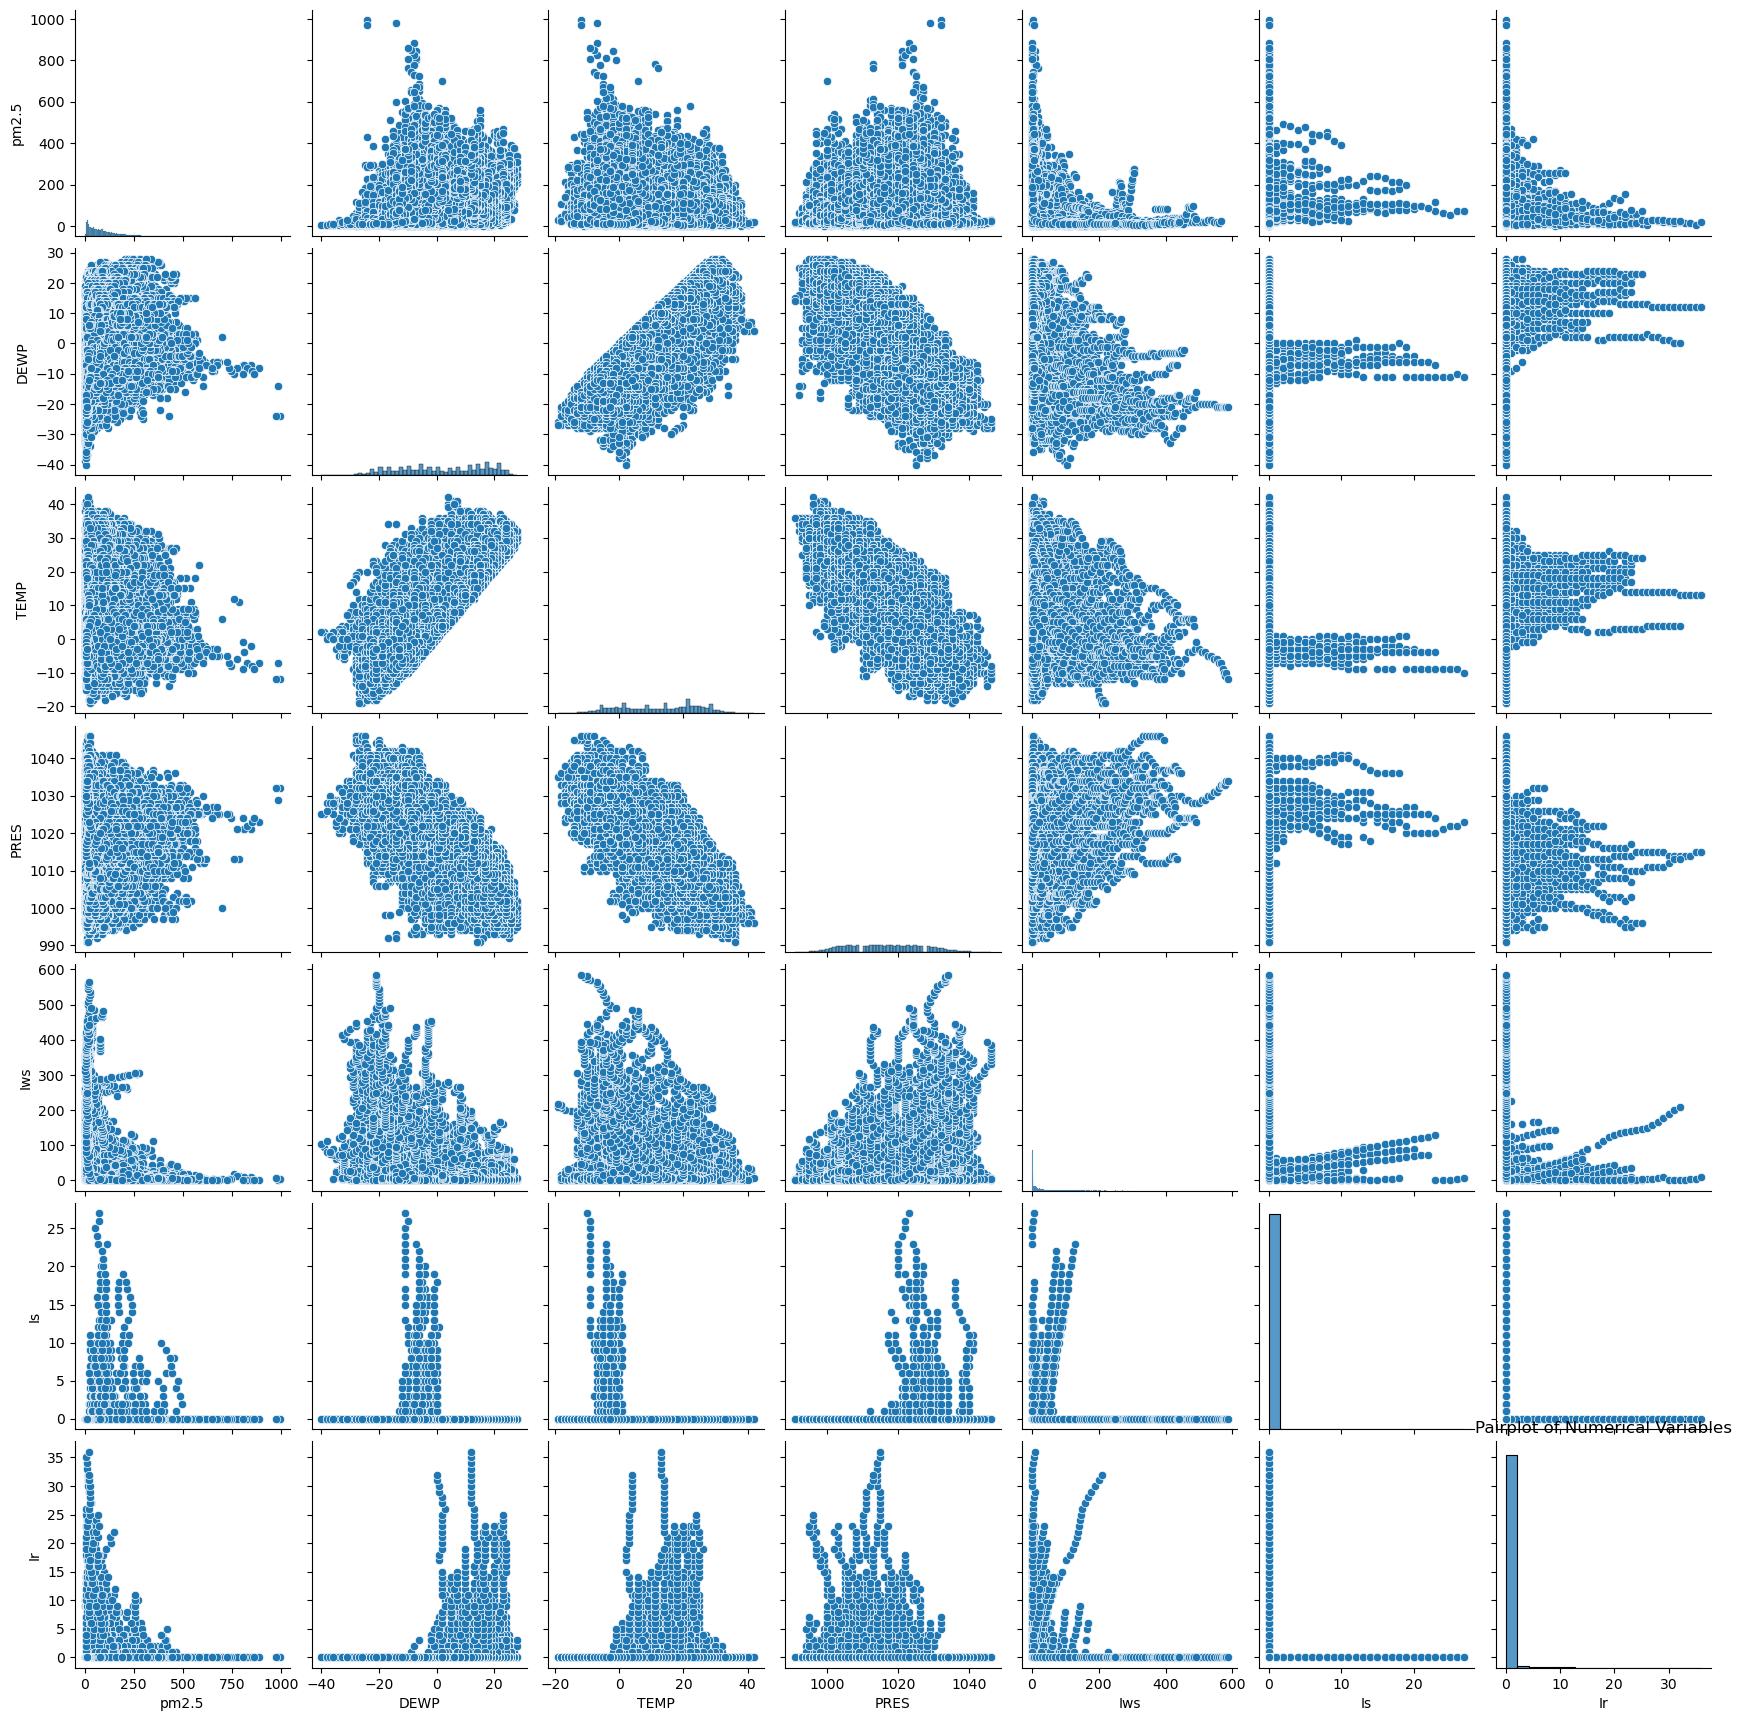

In [19]:
sns.pairplot(df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']])
plt.title('Pairplot of Numerical Variables')
plt.show()

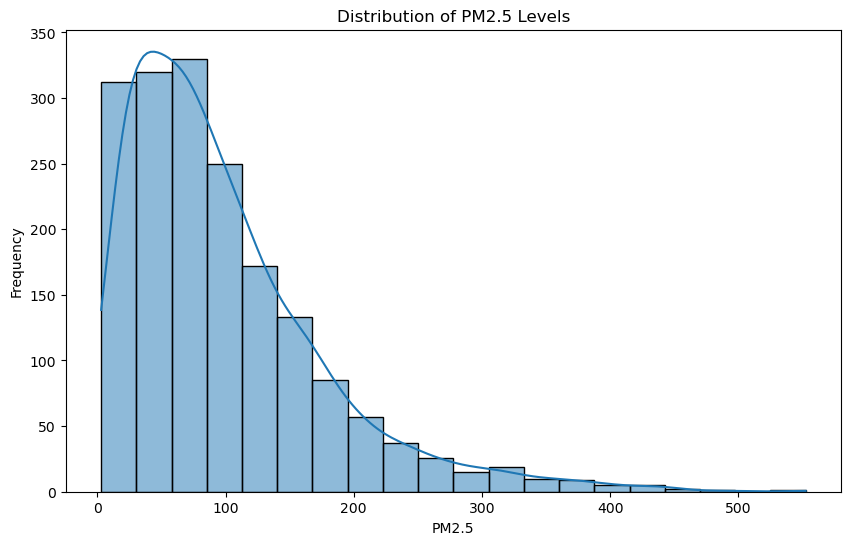

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['pm2.5'], bins=20, kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

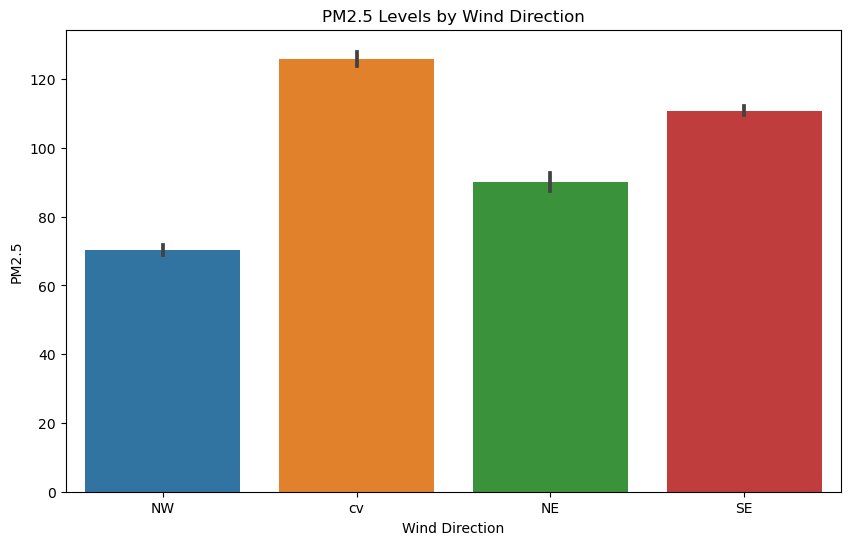

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cbwd', y='pm2.5', data=df)
plt.title('PM2.5 Levels by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5')
plt.show()

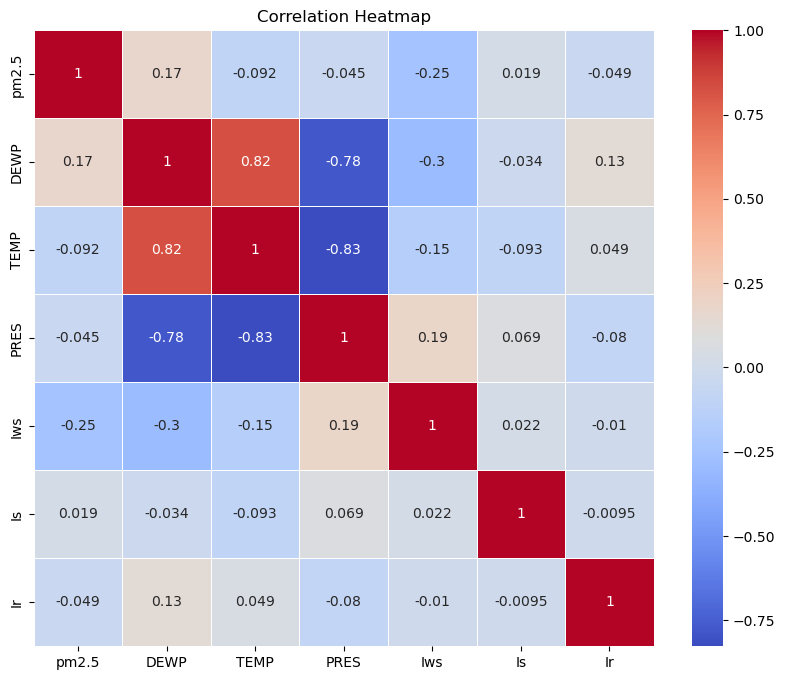

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

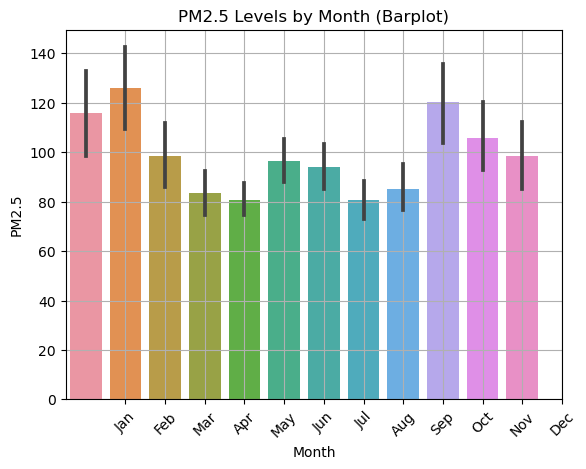

In [23]:
sns.barplot(x=daily_data['time'].dt.month, y=daily_data['pm2.5'])
plt.title('PM2.5 Levels by Month (Barplot)')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()

In [24]:
dd=daily_data
dd['Season'] = daily_data['time'].dt.month.apply(lambda x: 'Winter' if x in [11, 12, 1, 2, 3]
                                          else 'Spring' if x in [4, 5]
                                          else 'Summer' if x in [6, 7, 8]
                                          else 'Autumn')
dd.head()

time       pm2.5       DEWP       TEMP         PRES cbwd  \
time                                                                        
2010-01-02 2010-01-02  145.958333  -8.500000  -5.125000  1024.750000   SE   
2010-01-03 2010-01-03   78.833333 -10.125000  -8.541667  1022.791667   SE   
2010-01-04 2010-01-04   31.333333 -20.875000 -11.500000  1029.291667   NW   
2010-01-05 2010-01-05   42.458333 -24.583333 -14.458333  1033.625000   NW   
2010-01-06 2010-01-06   56.416667 -23.708333 -12.541667  1033.750000   NE   

                   Iws         Is   Ir  Season  
time                                            
2010-01-02   24.860000   0.708333  0.0  Winter  
2010-01-03   70.937917  14.166667  0.0  Winter  
2010-01-04  111.160833   0.000000  0.0  Winter  
2010-01-05   56.920000   0.000000  0.0  Winter  
2010-01-06   18.511667   0.000000  0.0  Winter

Season
Winter    108.622420
Autumn    103.300196
Summer     90.414929
Spring     81.985186
Name: pm2.5, dtype: float64


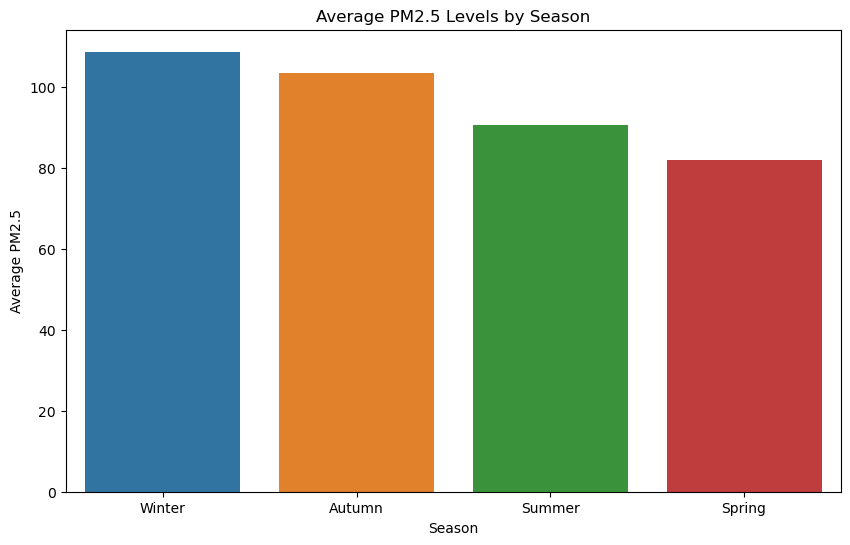

In [25]:
season_pm25_avg = dd.groupby('Season')['pm2.5'].mean().sort_values(ascending=False)
print(season_pm25_avg)

# Plotting the average PM2.5 values for each season
plt.figure(figsize=(10, 6))
sns.barplot(x=season_pm25_avg.index, y=season_pm25_avg.values)
plt.title('Average PM2.5 Levels by Season')
plt.xlabel('Season')
plt.ylabel('Average PM2.5')
plt.show()

In [26]:
daily_data.set_index('time')

pm2.5       DEWP       TEMP         PRES cbwd         Iws  \
time                                                                         
2010-01-02  145.958333  -8.500000  -5.125000  1024.750000   SE   24.860000   
2010-01-03   78.833333 -10.125000  -8.541667  1022.791667   SE   70.937917   
2010-01-04   31.333333 -20.875000 -11.500000  1029.291667   NW  111.160833   
2010-01-05   42.458333 -24.583333 -14.458333  1033.625000   NW   56.920000   
2010-01-06   56.416667 -23.708333 -12.541667  1033.750000   NE   18.511667   
...                ...        ...        ...          ...  ...         ...   
2014-12-27  238.666667  -9.666667  -1.791667  1027.833333   NW    9.278333   
2014-12-28  197.375000 -10.791667   1.583333  1019.958333   NW   10.948750   
2014-12-29  159.000000 -12.333333   0.750000  1013.750000   cv    8.000000   
2014-12-30   46.083333 -13.916667   1.875000  1019.125000   NW    9.778333   
2014-12-31   10.041667 -21.791667  -1.916667  1032.125000   NW  167.458333   

                   Is   Ir  Season  
time                                
2010-01-02   0.708333  0.0  Winter  
2010-01-03  14.166667  0.0  Winter  
2010-01-04   0.000000  0.0  Winter  
2010-01-05   0.000000  0.0  Winter  
2010-01-06   0.000000  0.0  Winter  
...               ...  ...     ...  
2014-12-27   0.000000  0.0  Winter  
2014-12-28   0.000000  0.0  Winter  
2014-12-29   0.000000  0.0  Winter  
2014-12-30   0.000000  0.0  Winter  
2014-12-31   0.000000  0.0  Winter  

[1789 rows x 9 columns]

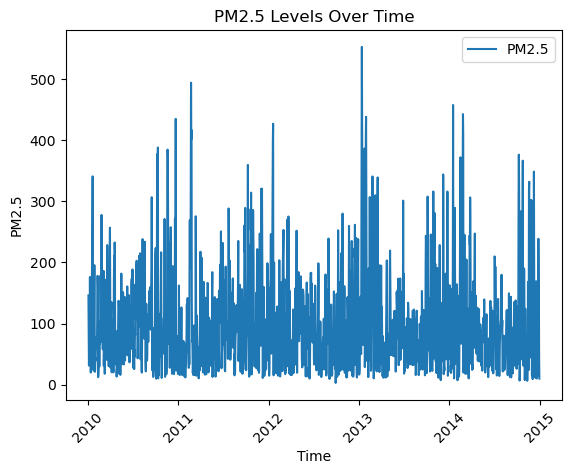

In [27]:

# PM2.5 levels over time
plt.plot(daily_data.index, daily_data['pm2.5'], label='PM2.5')
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.legend()


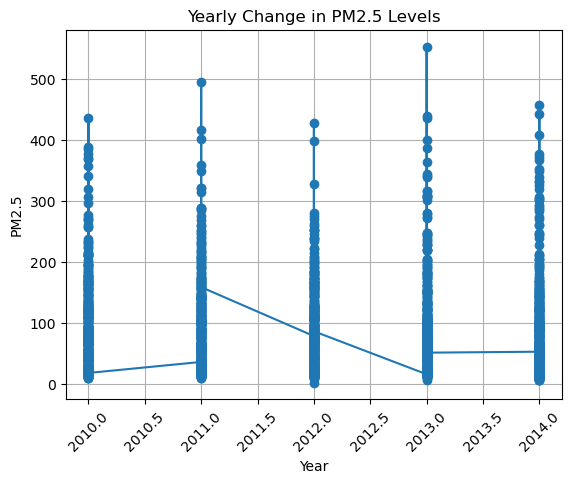

In [28]:
plt.plot(daily_data['time'].dt.year, daily_data['pm2.5'], marker='o')
plt.title('Yearly Change in PM2.5 Levels')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [29]:
daily_data['cbwd'] = daily_data['cbwd'].replace({'SE': 0, 'cv': 1, 'NW': 2,'NE': 3 })
daily_data.head()

time       pm2.5       DEWP       TEMP         PRES  cbwd  \
time                                                                         
2010-01-02 2010-01-02  145.958333  -8.500000  -5.125000  1024.750000     0   
2010-01-03 2010-01-03   78.833333 -10.125000  -8.541667  1022.791667     0   
2010-01-04 2010-01-04   31.333333 -20.875000 -11.500000  1029.291667     2   
2010-01-05 2010-01-05   42.458333 -24.583333 -14.458333  1033.625000     2   
2010-01-06 2010-01-06   56.416667 -23.708333 -12.541667  1033.750000     3   

                   Iws         Is   Ir  Season  
time                                            
2010-01-02   24.860000   0.708333  0.0  Winter  
2010-01-03   70.937917  14.166667  0.0  Winter  
2010-01-04  111.160833   0.000000  0.0  Winter  
2010-01-05   56.920000   0.000000  0.0  Winter  
2010-01-06   18.511667   0.000000  0.0  Winter

## Models

In [30]:
X = daily_data_encoded.drop(columns=['pm2.5','time'])
y = (np.round(np.log(daily_data_encoded['pm2.5'] + 0.01),3)).astype('float')
min(y)
x1=X
y1=y

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_sc_tr=X_train1
x_sc_te=X_test1
x_sc_tr.iloc[:,:-4] = scaler.fit_transform(X_train1.iloc[:,:-4])
x_sc_te.iloc[:,:-4] = scaler.transform(X_test1.iloc[:,:-4])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### ANN with SVR and RF

In [33]:
ann_model = Sequential([
        Dense(256, activation='selu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2), 
    Dense(128, activation='selu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),          
    Dense(64, activation='selu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='selu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='selu'),
    BatchNormalization(),
    Dense(12) 
])

print(ann_model.summary())
ann_model.compile(optimizer='adam', loss='mse')

checkpoint_path = "model_checkpoint.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
ann_model.fit(x_sc_tr, y_train1, epochs=100, batch_size=32, validation_split=0.2,callbacks=[checkpoint])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

Epoch 23/100
30/36 [========================>.....] - ETA: 0s - loss: 0.3615
Epoch 23: val_loss did not improve from 0.29712
36/36 [==============================] - 0s 13ms/step - loss: 0.3657 - val_loss: 0.3120
Epoch 24/100
34/36 [===========================>..] - ETA: 0s - loss: 0.3488
Epoch 24: val_loss did not improve from 0.29712
36/36 [==============================] - 0s 12ms/step - loss: 0.3427 - val_loss: 0.3054
Epoch 25/100
31/36 [========================>.....] - ETA: 0s - loss: 0.3665
Epoch 25: val_loss did not improve from 0.29712
36/36 [==============================] - 0s 13ms/step - loss: 0.3671 - val_loss: 0.3000
Epoch 26/100
35/36 [============================>.] - ETA: 0s - loss: 0.3417
Epoch 26: val_loss did not improve from 0.29712
36/36 [==============================] - 0s 14ms/step - loss: 0.3420 - val_loss: 0.2975
Epoch 27/100
34/36 [===========================>..] - ETA: 0s - loss: 0.3589
Epoch 27: val_loss did not improve from 0.29712
36/36 [================

33/36 [==========================>...] - ETA: 0s - loss: 0.3272
Epoch 61: val_loss did not improve from 0.28727
36/36 [==============================] - 0s 12ms/step - loss: 0.3275 - val_loss: 0.3057
Epoch 62/100
30/36 [========================>.....] - ETA: 0s - loss: 0.3094
Epoch 62: val_loss did not improve from 0.28727
36/36 [==============================] - 0s 13ms/step - loss: 0.3100 - val_loss: 0.3052
Epoch 63/100
32/36 [=========================>....] - ETA: 0s - loss: 0.3117
Epoch 63: val_loss did not improve from 0.28727
36/36 [==============================] - 0s 12ms/step - loss: 0.3179 - val_loss: 0.3081
Epoch 64/100
28/36 [======================>.......] - ETA: 0s - loss: 0.3212
Epoch 64: val_loss did not improve from 0.28727
36/36 [==============================] - 0s 13ms/step - loss: 0.3216 - val_loss: 0.3265
Epoch 65/100
33/36 [==========================>...] - ETA: 0s - loss: 0.3290
Epoch 65: val_loss did not improve from 0.28727
36/36 [=============================

36/36 [==============================] - 0s 9ms/step - loss: 0.3157 - val_loss: 0.3005
Epoch 100/100
29/36 [=======================>......] - ETA: 0s - loss: 0.3176
Epoch 100: val_loss did not improve from 0.28727
36/36 [==============================] - 0s 11ms/step - loss: 0.3179 - val_loss: 0.2993


In [34]:
loade_model = load_model(checkpoint_path)
extracted_features_train = loade_model.predict(X_train)
extracted_features_test = loade_model.predict(X_test)

scaler = StandardScaler()
scaled_extracted_features_train = scaler.fit_transform(extracted_features_train)
scaled_extracted_features_test = scaler.transform(extracted_features_test)

12/12 [==============================] - 0s 3ms/step


In [35]:
mc=1
r2=[]
for i in range(mc):
        rf = RandomForestRegressor(max_depth=5,min_samples_split=15,min_samples_leaf=6,n_estimators=200)
        rf.fit(scaled_extracted_features_train, y_train)
        y_pred = rf.predict(scaled_extracted_features_test)
        mse = mean_squared_error(y_test, y_pred)
        r2_scores=r2_score(y_test,y_pred)
        r2.append(r2_scores)
        
print("Mean Squared Error:", mse)
print('r2-squared value is :',np.mean(r2))

Mean Squared Error: 0.36057800574461857
r2-squared value is : 0.5108511421663808


In [36]:
loade_model = load_model(checkpoint_path)
extracted_features_train = loade_model.predict(x_sc_tr)
extracted_features_test = loade_model.predict(x_sc_te)

scaler = StandardScaler()
scaled_extracted_features_train = scaler.fit_transform(extracted_features_train)
scaled_extracted_features_test = scaler.transform(extracted_features_test)


svr_model = SVR(C=10, kernel='rbf')
svr_model.fit(scaled_extracted_features_train, y_train1)

y_pred = svr_model.predict(scaled_extracted_features_test)
mse = mean_squared_error(y_test1, y_pred)
r2_scores=r2_score(y_test1,y_pred)
print("Mean Squared Error:", mse)
print("Accuracy:", r2_scores)
print("The MAE:",mean_absolute_error(y_test,y_pred))
n = len(X_train)
p = X_train.shape[1]
adjusted_r_squared = 1 - ((1 - r2_scores) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r_squared)

12/12 [==============================] - 0s 1ms/step
Mean Squared Error: 0.2694179948213707
Accuracy: 0.6345159650696077
The MAE: 0.4014529773538686
Adjusted R-squared: 0.6319421338377036


In [37]:
print("Accuracy:", r2_scores)

Accuracy: 0.6345159650696077


### Linear Regression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 0.33699162126200394
Mean Absolute Error: 0.45818084156188876
Root Mean Squared Error: 0.5805097942860258
R^2 Score: 0.5428476944970487


### SVR

In [40]:
model_svr = SVR(C=10, kernel='rbf')
model_svr.fit(X_train_scaled, y_train)
y_pred_svr = model_svr.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression:")
print("Mean Squared Error:", mse_svr)
print("R^2 Score:", r2_svr)


Support Vector Regression:
Mean Squared Error: 0.28735066809827176
R^2 Score: 0.6101890607339275


In [41]:
y_train.values


array([4.807, 5.179, 3.59 , ..., 4.297, 4.629, 4.214])

### Polynomial Regression

In [42]:
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model_plr = LinearRegression()
model_plr.fit(X_train_poly, y_train)
y_pred_plr = model_plr.predict(X_test_poly)
mse_plr = mean_squared_error(y_test, y_pred_plr)
r2_plr = r2_score(y_test, y_pred_plr)

print("\nPolynomial Regression:")
print("Mean Squared Error:", mse_plr)
print("R^2 Score:", r2_plr)


Polynomial Regression:
Mean Squared Error: 0.3204981851270858
R^2 Score: 0.565222174688891


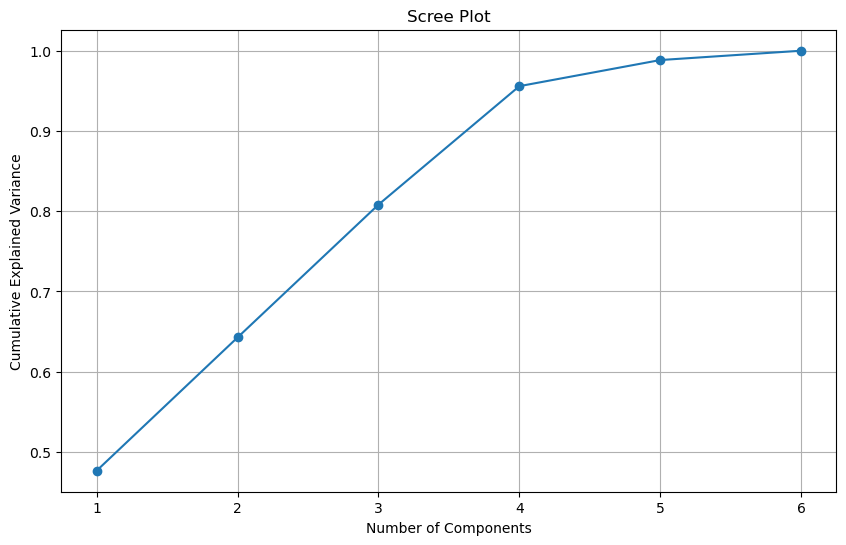

Number of PCs retained for 95% variance explained: 4
Total variance explained with 4 components: 0.9558


In [43]:
df_numeric = daily_data.drop(columns=['pm2.5','cbwd', 'time','Season'])  # Exclude 'time' and 'cbwd' columns

# Standardize the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA to find the number of PCs to retain based on explained variance ratio
pca = PCA()
pca_result = pca.fit(df_scaled)

# Plot the scree plot to visualize explained variance per component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Determine the number of components needed to retain 95% variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_retained = np.argmax(cumulative_variance >= 0.95) + 1
explained_variance_threshold = cumulative_variance[n_components_retained - 1]

print(f"Number of PCs retained for 95% variance explained:", n_components_retained)
print(f"Total variance explained with {n_components_retained} components: {explained_variance_threshold:.4f}")

# Perform PCA with the determined number of PCs
pca = PCA(n_components=n_components_retained)
df_pca = pca.fit_transform(df_scaled)

In [44]:
n_components_retained = 4  # Example: determined from scree plot or explained variance threshold
pca = PCA(n_components=n_components_retained)
df_pca = pca.fit_transform(df_scaled)

# Extract target variable 'PM2.5' for regression
y = np.log(daily_data['pm2.5'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 0.55
R-squared (R2) Score: 0.2545


In [45]:
X = daily_data[['DEWP', 'TEMP', 'PRES','cbwd', 'Iws', 'Is', 'Ir']]
y = daily_data['pm2.5']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [48]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [50]:
print(lin_reg.intercept_)

98.67270217940667


In [51]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
DEWP    86.650033
TEMP  -115.248326
PRES   -24.970242
cbwd   -13.607299
Iws     -9.502050
Is      -7.019017
Ir     -10.914115

In [52]:
pred = lin_reg.predict(X_test)

In [53]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [54]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [55]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 44.264794399596
MSE: 3683.0360410677363
RMSE: 60.68802222076228
R2 Square 0.3579002577036142
__________________________________
